<a href="https://colab.research.google.com/github/tphlabs/python_workshop/blob/main/Linear_regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

v.0.1.3

Linear Regression is a fundamental statistical technique used to model the relationship between a dependent variable and one or more independent variables
## 1. Introduction to Linear Regression

Linear Regression aims to find the best-fitting linear relationship between the dependent variable (often called the response or target) and the independent variable(s) (often called predictors or features). The simplest form is Simple Linear Regression, which involves one dependent and one independent variable. Multiple Linear Regression involves one dependent and multiple independent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

## Example data

$$
x = (x_1, \dots , x_n),  \qquad y = (y_1, \dots , y_n)
$$


In [2]:
x = np.array([1, 2, 3, 4, 5])  # Independent variable
y = np.array([2, 3, 5, 7, 11])  # Dependent variable



## Linear fit

$$
Y = a x + b,
$$

where

$a$ - slope, $b$ - intercept.



In [5]:
import numpy as np
from scipy.stats import linregress

x = np.array([1, 2, 3, 4, 5])  # Independent variable
y = np.array([2, 3, 5, 7, 11])  # Dependent variable

fit = linregress(x, y)
slope = fit.slope
intercept = fit.intercept
slope_err = fit.stderr
intercept_err = fit.intercept_stderr
print(f'Linear fit parameters:')
print(f'slope    : {slope:.1f} ± {slope_err:.1f}')
print(f'intercept: {intercept:.1f} ± {intercept_err:.1f}')

Linear fit parameters:
slope    : 2.2 ± 0.3
intercept: -1.0 ± 1.0


## Display on plot with prediction confindence interval


Predictionִִִִִִ error (simplified, not quite correct*)
$$
\hat\sigma^2 \approx \frac{\sum{(y_i - Y)^2}}{n-2}
$$

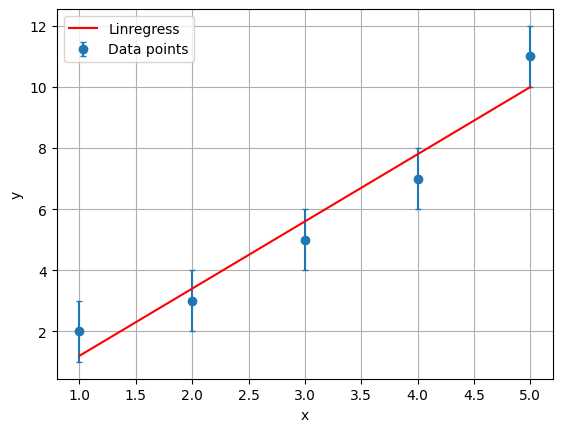

In [12]:
Y = x * slope + intercept
n = len(y)
sigma = np.sqrt(np.sum((y - Y)**2) / (n-2))

ci_upper = Y + sigma
ci_lower = Y - sigma
#plt.fill_between(x, ci_lower, ci_upper, color='lightgray', alpha=0.5, label=r'Fit uncertainty ')

#plt.scatter(x, y, label='Data points')
plt.errorbar(x, y, yerr=1, fmt='o', ls='', capsize=2, label='Data points')

plt.plot(x, Y, color='red', label='Linregress')

plt.xlabel('x')
plt.ylabel('y')
plt.grid('on')
plt.legend()

np.float64(-3.802235375304884e-15)

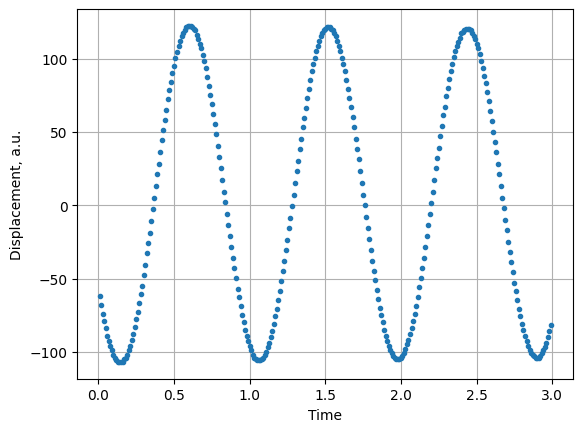

In [34]:
url = 'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab1_HO/data5000.txt'

t, x = np.genfromtxt(url, usecols=[1,3], skip_header=1, delimiter='\t', unpack=True)
mask = t < 3
t = t[mask]
x = x[mask]
x = x - np.mean(x)
plt.plot(t, x, '.')
plt.xlabel('Time')
plt.ylabel('Displacement, a.u.')
plt.grid()

In [45]:
from scipy.optimize import curve_fit

def harmonic(t, amp, omega, phase, offset):
  return amp * np.sin(omega * t + phase) + offset

initial = [100, 6.6, 0,       0]
bounds = ([0,   1,  -np.pi, -10],
          [200, 10,  np.pi,  10])
parameters, _ = curve_fit(harmonic, t, x, p0=initial, bounds=bounds)
y_expected = harmonic(t, *parameters)
print(parameters)

[113.46582774   6.84902342  -2.55820613   7.98472492]


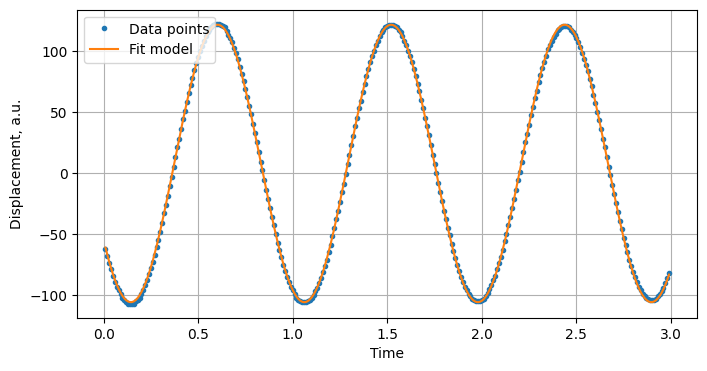

In [46]:
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(t, x, '.', label='Data points')
plt.plot(t, y_expected, label=r'Fit model')
plt.xlabel('Time')
plt.ylabel('Displacement, a.u.')
plt.grid()
plt.legend(loc='upper left')